<a href="https://colab.research.google.com/github/sutanmuleta/Brain-Tumor-Detection-Using-Convolutional-Neural-Networks-CNN-/blob/main/braintumor_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import os


uploaded = files.upload()


os.makedirs('/content/Brain_Tumor', exist_ok=True)


for filename in uploaded.keys():
    !unzip -q "{filename}" -d "/content/Brain_Tumor"


data_dir = '/content/Brain_Tumor/Brain Tumor'


try:
    categories = os.listdir(data_dir)
    print("Categories:", categories)

    for category in categories:
        path = os.path.join(data_dir, category)
        images = os.listdir(path)
        if images:
            print(f"{category} has {len(images)} images. Sample image: {images[0]}")
        else:
            print(f"{category} has no images.")
except FileNotFoundError as e:
    print(f"Error: {e}")



Saving archive (1).zip to archive (1).zip
Categories: ['Brain Tumor']
Brain Tumor has 3762 images. Sample image: Image2794.jpg


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical

# Parameters
img_size = 128
data = []
labels = []

# Function to load and preprocess images
def load_images_from_directory(directory, label):
    for img in os.listdir(directory):
        try:
            img_path = os.path.join(directory, img)
            img_array = cv2.imread(img_path)
            img_array = cv2.resize(img_array, (img_size, img_size))
            data.append(img_array)
            labels.append(label)
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")


category_path = os.path.join(data_dir, 'Brain Tumor')
load_images_from_directory(category_path, 1)


data = np.array(data) / 255.0
labels = np.array(labels)
labels = to_categorical(labels, num_classes=2)

print("Data shape:", data.shape)
print("Labels shape:", labels.shape)


Data shape: (3762, 128, 128, 3)
Labels shape: (3762, 2)


In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Validation data shape:", X_val.shape)


Training data shape: (3009, 128, 128, 3)
Validation data shape: (753, 128, 128, 3)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

In [ ]:

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=32)


model.save('brain_tumor_classifier.h5')


Epoch 1/10
95/95 [==============================] - 111s 1s/step - loss: 0.0068 - accuracy: 0.9987 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
95/95 [==============================] - 98s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
95/95 [==============================] - 102s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
95/95 [==============================] - 103s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
95/95 [==============================] - 107s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
95/95 [==============================] - 104s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
95/95 [==============================] - 102s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_lo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2


img_size = 128


data = []
labels = []

def load_images_from_directory(directory, label):
    for img in os.listdir(directory):
        try:
            img_path = os.path.join(directory, img)
            img_array = cv2.imread(img_path)
            if img_array is not None:  # Check if image was loaded
                img_array = cv2.resize(img_array, (img_size, img_size))
                data.append(img_array)
                labels.append(label)
            else:
                print(f"Warning: Image {img_path} could not be loaded.")
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")


data_dir = '/content/Brain_Tumor/Brain Tumor'  # Adjust if needed

try:
    categories = os.listdir(data_dir)
    print("Categories found:", categories)

    # Load images for each category
    for category in categories:
        category_path = os.path.join(data_dir, category)
        label = categories.index(category)  # Assign a numerical label to each category
        load_images_from_directory(category_path, label)

    # Convert data and labels to numpy arrays
    data = np.array(data)
    labels = np.array(labels)

    # Split the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)

    # Proceed with data augmentation and model training
    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    train_generator = datagen.flow(X_train, y_train, batch_size=32)

    # Assuming 'model' is already defined and compiled
    history = model.fit(train_generator, epochs=10, validation_data=(X_val, y_val))

except FileNotFoundError as e:
    print(f"Error: {e}")

except Exception as e:
    print(f"Unexpected error: {e}")


Categories found: ['Brain Tumor']
Unexpected error: name 'model' is not defined


In [ ]:
# Import necessary libraries
import os
import cv2  # OpenCV for image processing
import numpy as np


In [ ]:
# Set the desired image size for resizing
img_size = 128  # You can adjust this size if needed

# Initialize lists for storing image data and labels
data = []
labels = []
# Define a function to load and preprocess images
def load_images_from_directory(directory, label):
    for img in os.listdir(directory):
        try:
            img_path = os.path.join(directory, img)
            img_array = cv2.imread(img_path)  # Read the image using OpenCV
            if img_array is not None:  # Check if the image was loaded successfully
                img_array = cv2.resize(img_array, (img_size, img_size))  # Resize the image
                data.append(img_array)  # Add the image data to the list
                labels.append(label)    # Add the corresponding label
            else:
                print(f"Warning: Image {img_path} could not be loaded.")
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")


In [ ]:
!pip install pillow


In [ ]:
import os
import numpy as np
import cv2  # OpenCV for image processing
from sklearn.model_selection import train_test_split
from PIL import Image  # PIL for additional image processing checks

# Set the desired image size for resizing
img_size = 128

# Initialize lists for storing image data and labels
data = []
labels = []

# Define the function to load and preprocess images
def load_images_from_directory(directory, label):
    for img in os.listdir(directory):
        try:
            img_path = os.path.join(directory, img)
            # Use PIL to open the image
            with Image.open(img_path) as image:
                img_array = np.array(image)
                if img_array is not None:
                    img_array = cv2.resize(img_array, (img_size, img_size))
                    data.append(img_array)
                    labels.append(label)
                else:
                    print(f"Warning: Image {img_path} could not be loaded.")
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")

# Set the directory path to your images
data_dir = '/content/Brain_Tumor/Brain Tumor'  # Adjust to the correct path

# Load images for each category
try:
    categories = os.listdir(data_dir)
    print("Categories found:", categories)

    for category in categories:
        category_path = os.path.join(data_dir, category)
        label = categories.index(category)  # Assign a label to each category
        load_images_from_directory(category_path, label)

    # Convert data and labels to numpy arrays
    data = np.array(data)
    labels = np.array(labels)
    print(f"Loaded {len(data)} images with {len(labels)} labels.")

except FileNotFoundError as e:
    print(f"Error: {e}")


Categories found: ['Brain Tumor']
Loaded 3762 images with 3762 labels.


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)

# Print the sizes of the splits to verify
print(f"Training data size: {len(X_train)}, Validation data size: {len(X_val)}")


Training data size: 3009, Validation data size: 753


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define a simple CNN model
model = Sequential()

# Add convolutional and pooling layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten and add dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Use 'softmax' if you have more than two categories

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,       # Rotate the image by up to 20 degrees
    width_shift_range=0.2,   # Shift the image width by up to 20%
    height_shift_range=0.2,  # Shift the image height by up to 20%
    shear_range=0.2,         # Shear the image by up to 20%
    zoom_range=0.2,          # Zoom in or out by up to 20%
    horizontal_flip=True,    # Flip the image horizontally
    fill_mode='nearest'      # Fill in any empty pixels
)


train_generator = datagen.flow(np.array(X_train), np.array(y_train), batch_size=32)


history = model.fit(train_generator, epochs=10, validation_data=(np.array(X_val), np.array(y_val)))


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


95/95 ━━━━━━━━━━━━━━━━━━━━ 115s 1s/step - accuracy: 0.9865 - loss: 0.1106 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 112s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 109s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 151s 1s/step - accuracy: 1.0000 

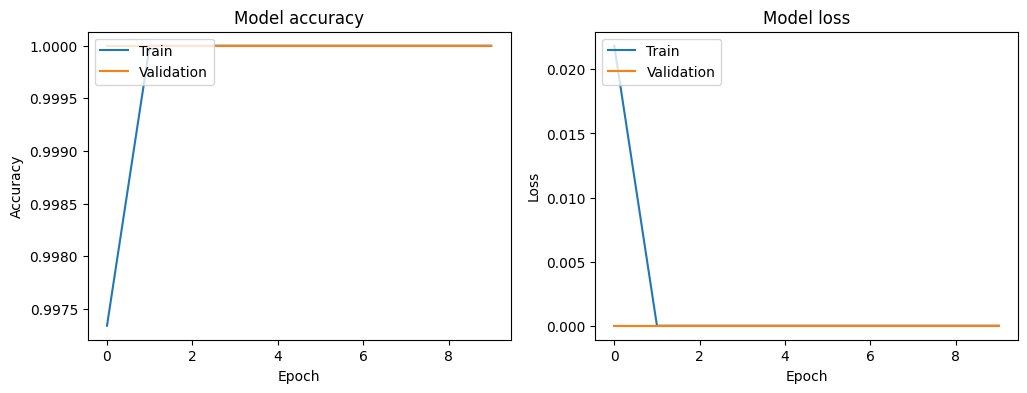

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(data, labels, test_size=0.3, random_state=42)  # 70% train, 30% temporary
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)   # 15% validation, 15% test

print(f"Training data size: {len(X_train)}, Validation data size: {len(X_val)}, Test data size: {len(X_test)}")


Training data size: 2633, Validation data size: 564, Test data size: 565


In [ ]:

test_loss, test_accuracy = model.evaluate(np.array(X_test), np.array(y_test))
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 250ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Test Accuracy: 100.00%


In [ ]:
!apt-get install -y graphviz
!pip install pydot pydotplus


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


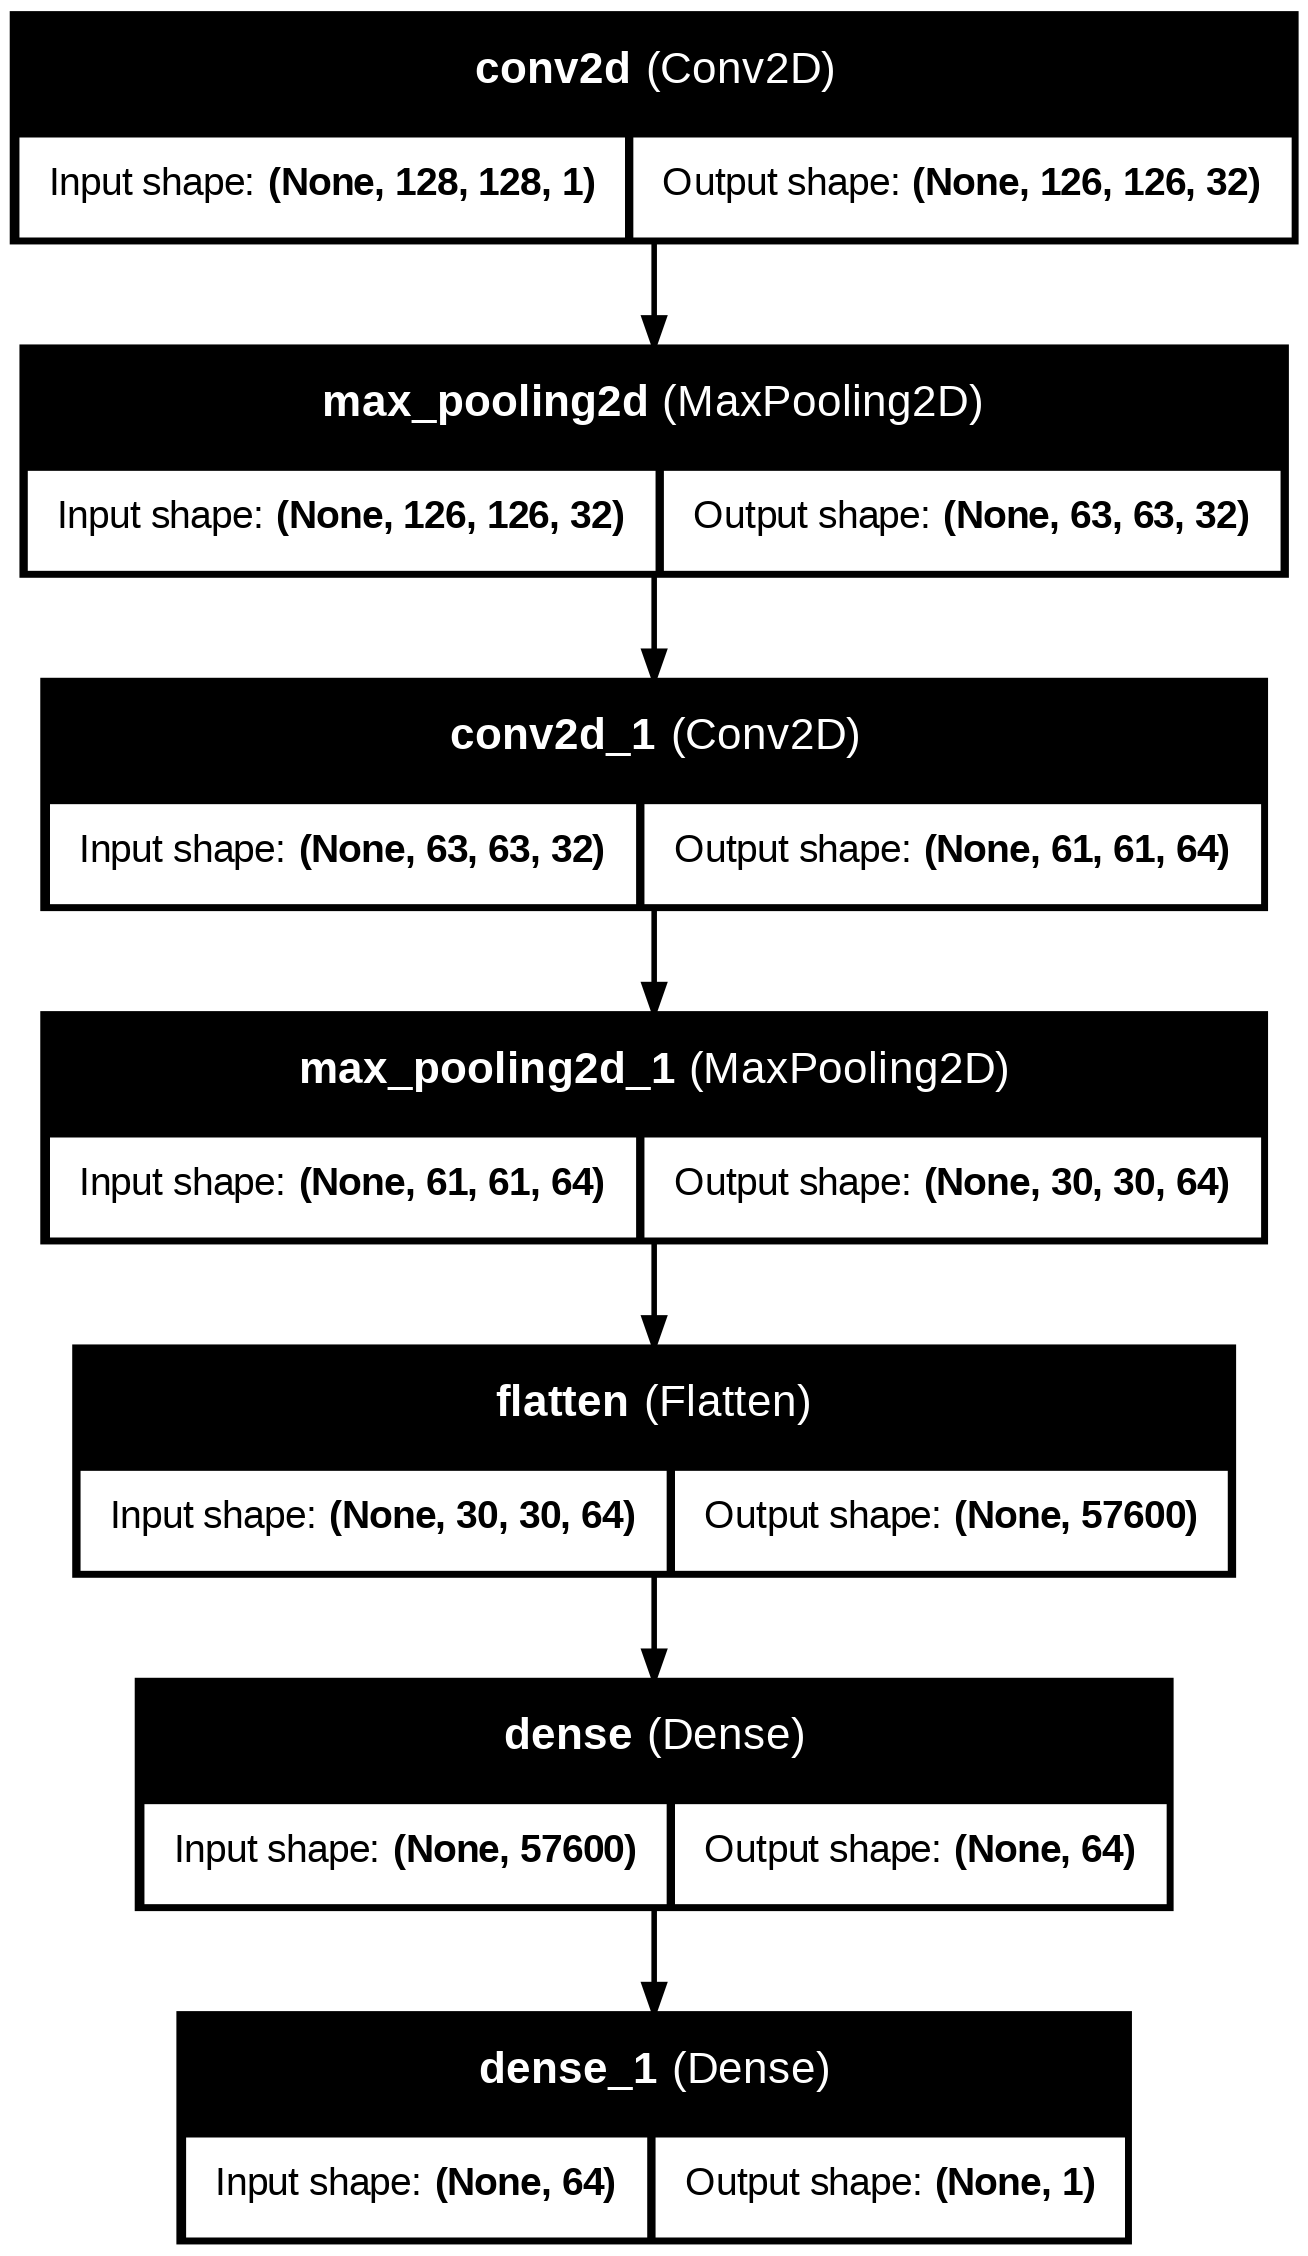

In [ ]:

!apt-get install -y graphviz
!pip install pydot pydotplus


from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Visualize the model architecture
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

# Display the plot within Google Colab
from IPython.display import Image
Image(filename='model.png')


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


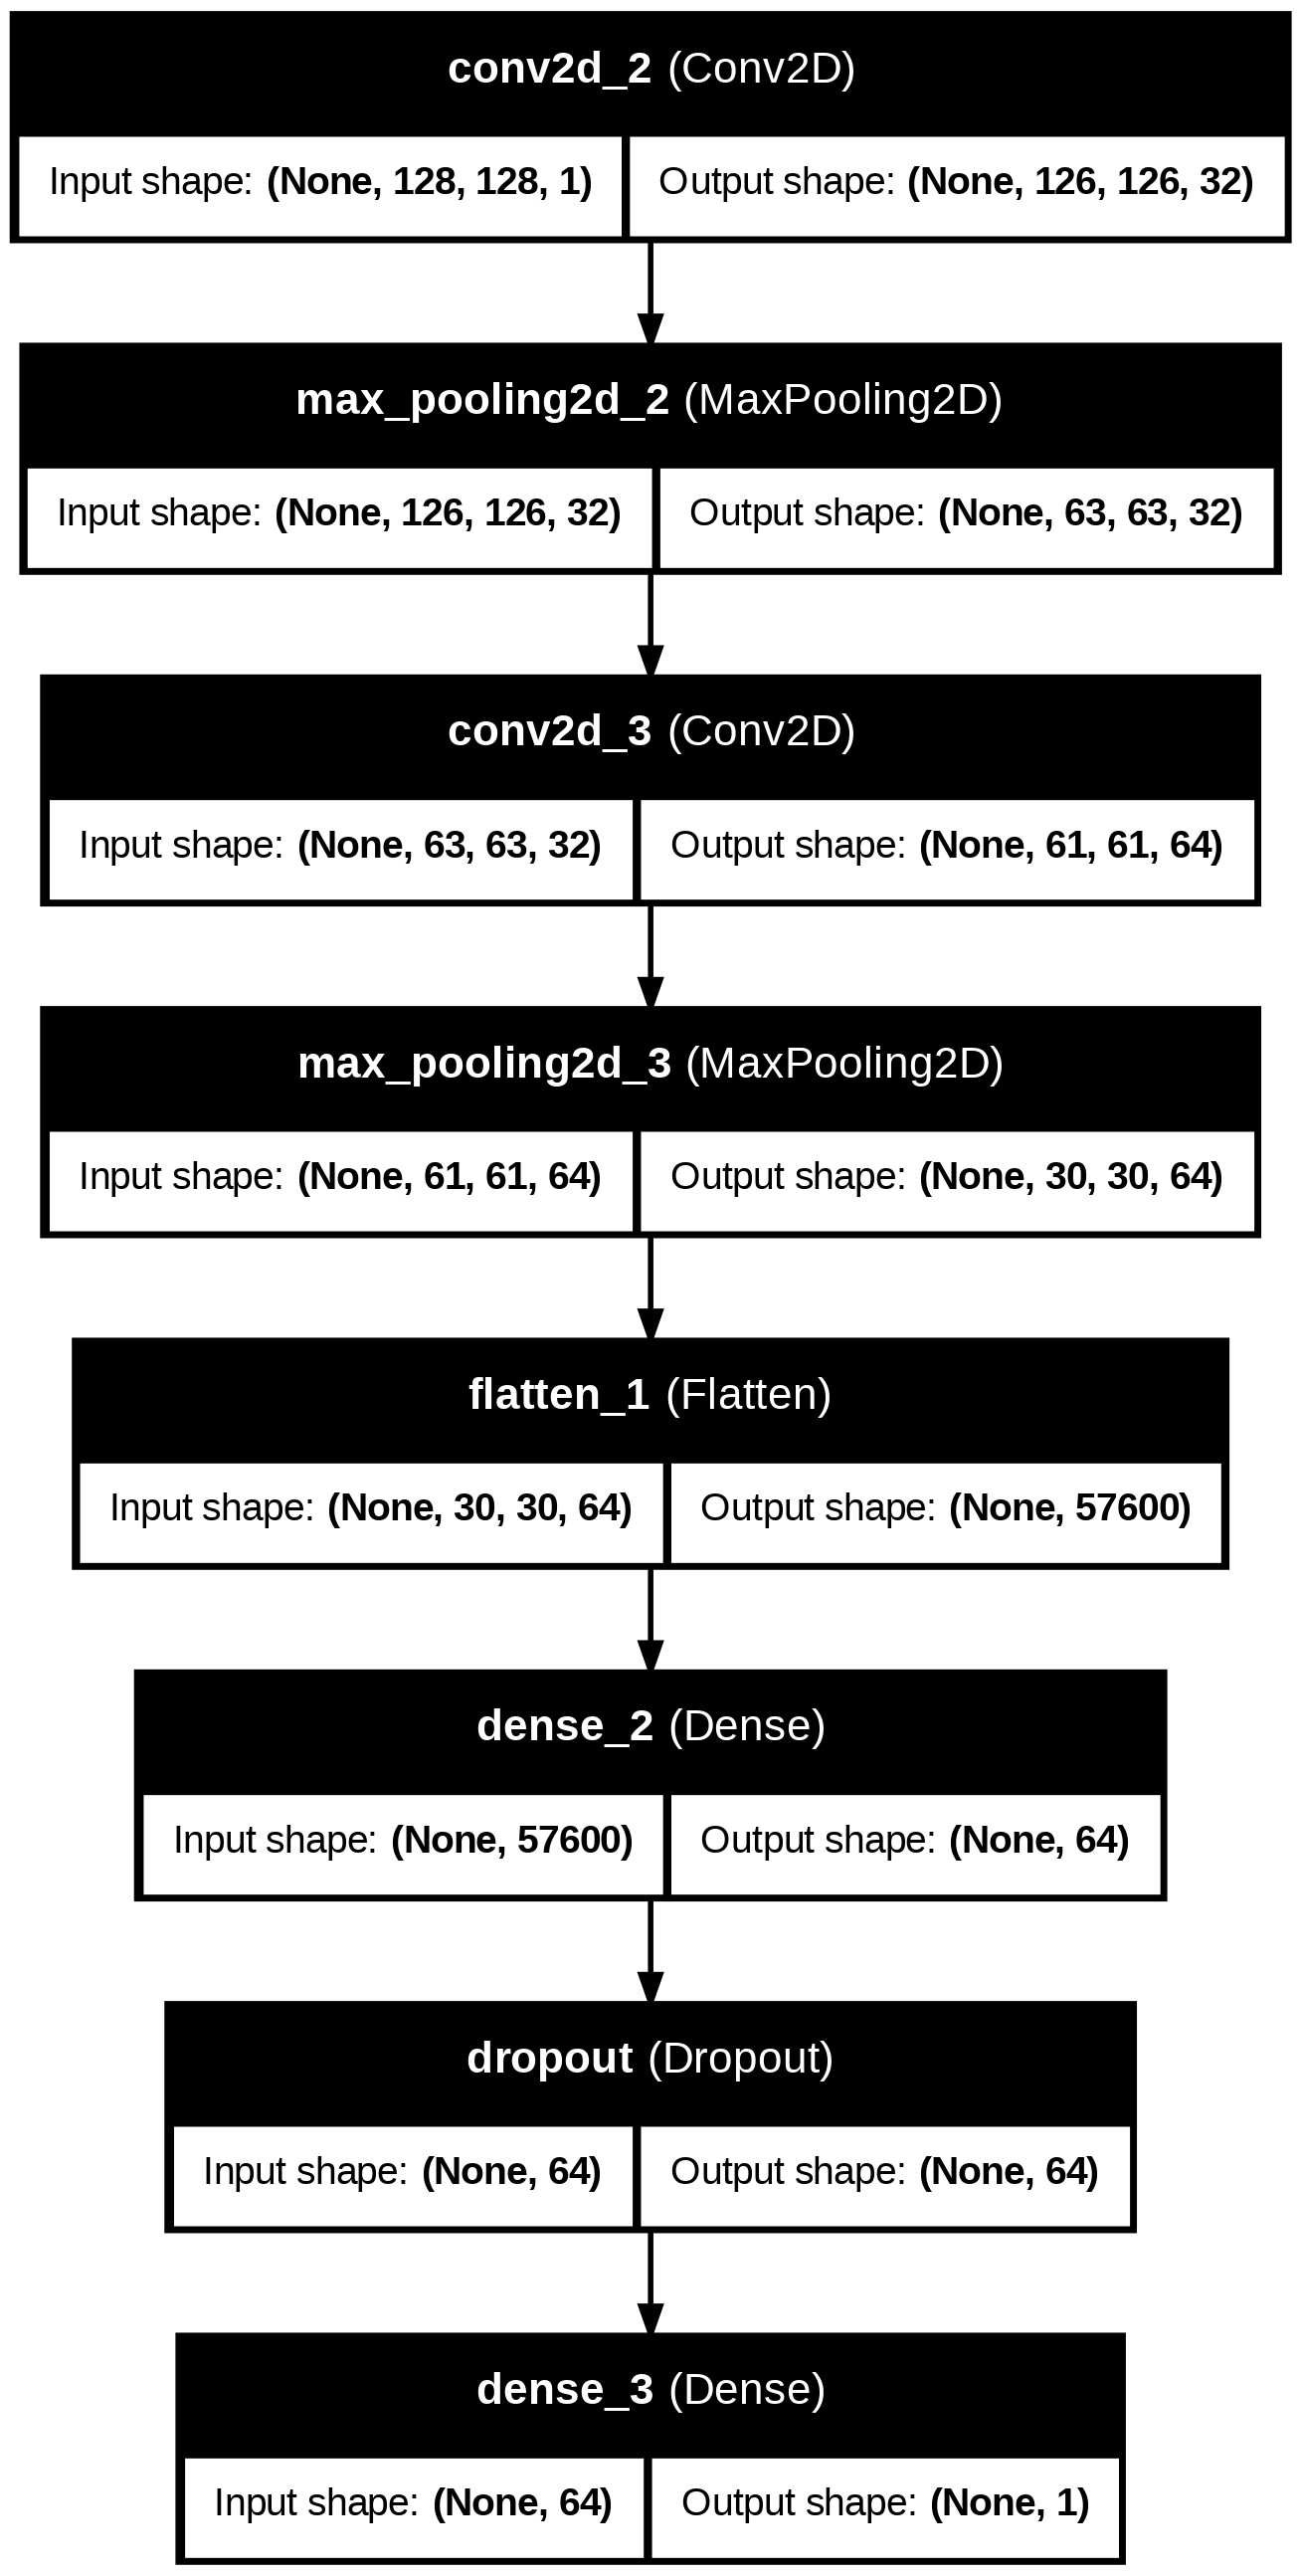

In [ ]:
# Install necessary packages
!apt-get install -y graphviz
!pip install pydot pydotplus

# Import libraries
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Visualize the model architecture
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

# Display the plot within Google Colab
from IPython.display import Image
Image(filename='model.png')


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load sample data (using MNIST for demonstration, replace with your dataset)
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data (normalize and reshape)
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Convert labels to categorical
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 46s 53ms/step - accuracy: 0.8786 - loss: 0.4204 - val_accuracy: 0.9838 - val_loss: 0.0575
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 85s 57ms/step - accuracy: 0.9828 - loss: 0.0568 - val_accuracy: 0.9867 - val_loss: 0.0478
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 79s 54ms/step - accuracy: 0.9888 - loss: 0.0362 - val_accuracy: 0.9900 - val_loss: 0.0358
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 81s 53ms/step - accuracy: 0.9916 - loss: 0.0290 - val_accuracy: 0.9898 - val_loss: 0.0386
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 83s 54ms/step - accuracy: 0.9933 - loss: 0.0214 - val_accuracy: 0.9883 - val_loss: 0.0387


In [ ]:
# Get predictions from the model on the test data
predictions = model.predict(test_images)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report

# Get predictions from the model on the test data
predictions = model.predict(test_images)

# Assuming test_labels are in one-hot encoded format (if not, this step can be skipped)
if len(test_labels.shape) > 1:
    true_classes = test_labels.argmax(axis=1)
else:
    true_classes = test_labels

# Convert predictions to binary class labels (assuming binary classification)
predicted_classes = (predictions > 0.5).astype("int32").reshape(-1)

# Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Tumor', 'Tumor'], yticklabels=['Non-Tumor', 'Tumor'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Compute ROC curve and AUC for the binary classification
fpr, tpr, thresholds = roc_curve(true_classes, predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Print classification report
report = classification_report(true_classes, predicted_classes, target_names=['Non-Tumor', 'Tumor'])
print("\nClassification Report:\n", report)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


ValueError: Found input variables with inconsistent numbers of samples: [10000, 100000]

In [ ]:
print(f"True Classes Shape: {true_classes.shape}")
print(f"Predictions Shape: {predictions.shape}")


True Classes Shape: (10000,)
Predictions Shape: (10000, 10)


In [ ]:
# Convert predictions to class labels by taking the argmax
predicted_classes = np.argmax(predictions, axis=1)

# Ensure true_classes are not one-hot encoded
if len(test_labels.shape) > 1:
    true_classes = test_labels.argmax(axis=1)
else:
    true_classes = test_labels


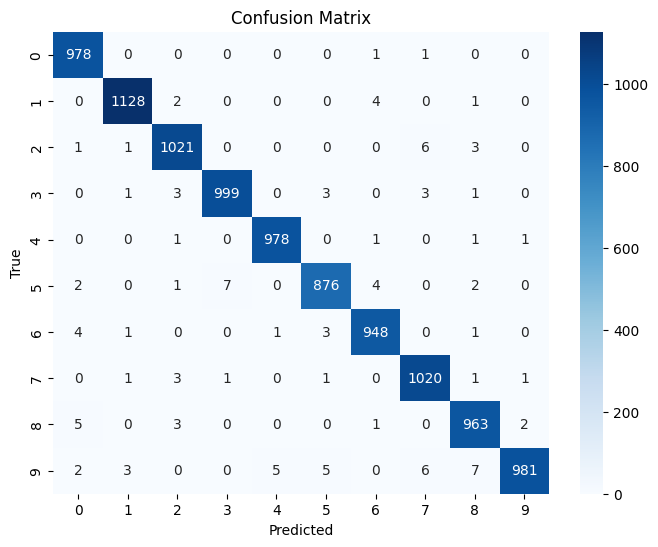

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step


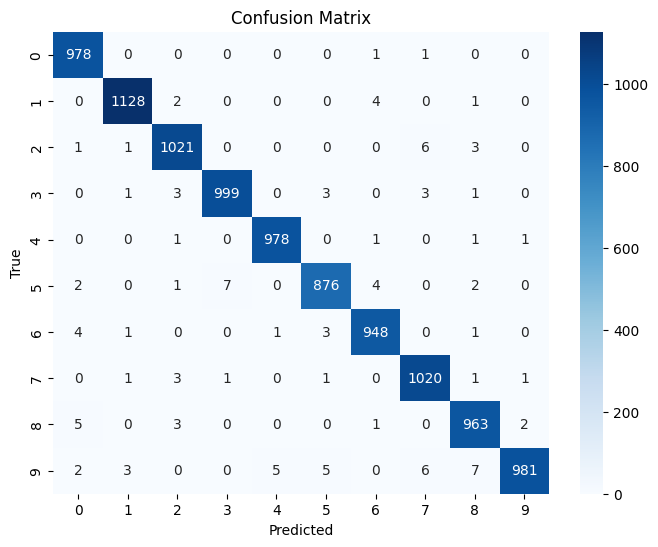

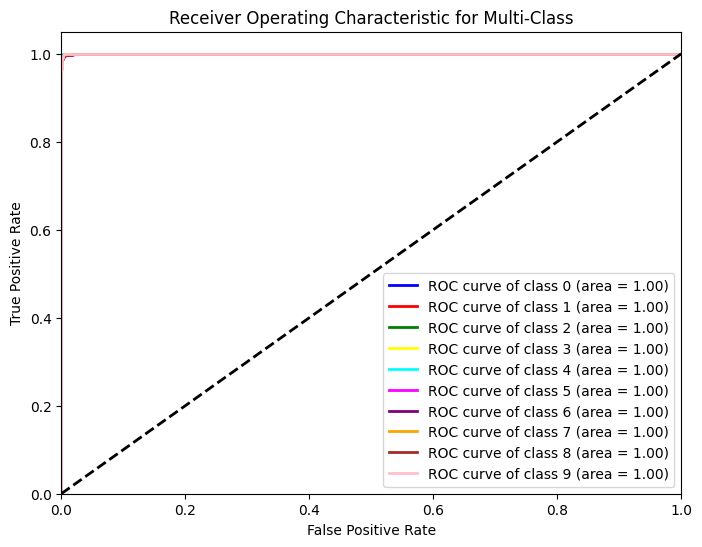


Classification Report:
               precision    recall  f1-score   support

     Class 0       0.99      1.00      0.99       980
     Class 1       0.99      0.99      0.99      1135
     Class 2       0.99      0.99      0.99      1032
     Class 3       0.99      0.99      0.99      1010
     Class 4       0.99      1.00      0.99       982
     Class 5       0.99      0.98      0.98       892
     Class 6       0.99      0.99      0.99       958
     Class 7       0.98      0.99      0.99      1028
     Class 8       0.98      0.99      0.99       974
     Class 9       1.00      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Get predictions from the model on the test data
predictions = model.predict(test_images)

# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Ensure true_classes are not one-hot encoded
if len(test_labels.shape) > 1:
    true_classes = test_labels.argmax(axis=1)
else:
    true_classes = test_labels

# Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Binarize the true classes for multi-class ROC curve
true_classes_bin = label_binarize(true_classes, classes=range(10))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = true_classes_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(true_classes_bin[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'red', 'green', 'yellow', 'cyan', 'magenta', 'purple', 'orange', 'brown', 'pink'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-Class')
plt.legend(loc='lower right')
plt.show()

# Print classification report
report = classification_report(true_classes, predicted_classes, target_names=[f'Class {i}' for i in range(10)])
print("\nClassification Report:\n", report)


In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_images, test_labels)

# Print the results
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9862 - loss: 0.0368
Test Loss: 0.030602172017097473
Test Accuracy: 0.9891999959945679


In [ ]:
!pip install shap


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 24.4 MB/s eta 0:00:00


In [ ]:
import numpy as np

# Convert test_images to a numpy array if it's not already
test_images = np.array(test_images)


In [ ]:
import shap

# Initialize the SHAP explainer with your model and a small subset of test images
explainer = shap.DeepExplainer(model, test_images[:100])  # use a subset for initialization

# Calculate SHAP values for the test images
shap_values = explainer.shap_values(test_images)

# Plot SHAP summary plot
shap.summary_plot(shap_values, test_images)

# Plot SHAP dependence plot for a specific feature (e.g., feature 0)
shap.dependence_plot(0, shap_values[0], test_images)


/usr/local/lib/python3.10/dist-packages/shap/explainers/_deep/deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")
